# Part 02: Exploratory Data Analysis (EDA)
Before I going enter the modeling stage, I will going back to Data Understanding stage. In Data Understanding stage, I want to explore and find pattern between independent variable and dependent variable and from this stage I can find out whether I need feature engineering or not and what model I should use. All of these things can sometimes be called EDA (Exploratory Data Analysis)

## EDA:
<center><img src = "https://editor.analyticsvidhya.com/uploads/24537Zoom-EDA.png" alt = "EDA"></center>

## Library

In [108]:
library(ggplot2)

In [109]:
library(GGally)

In [110]:
library(dplyr)

## Option

In [111]:
options(repr.plot.width = 7, repr.plot.height = 6)

## 1. Load Data:
First, I will load the data and see the summary descriptive statistics of dataset

In [112]:
data <- read.csv("insuranceDataCleaned.csv")

In [113]:
df <- data.frame(data)

In [114]:
head(df)

,age,sex,bmi,children,smoker,region,charges
,<int>,<chr>,<dbl>,<int>,<chr>,<chr>,<dbl>
1,19,female,27.900,0,yes,southwest,16884.924
2,18,male,33.770,1,no,southeast,1725.552
3,28,male,33.000,3,no,southeast,4449.462
4,33,male,22.705,0,no,northwest,21984.471
5,32,male,28.880,0,no,northwest,3866.855
6,31,female,25.740,0,no,southeast,3756.622


There is character data type in dataset. In order to be used for summary descriptive statistic, it must be converted into a factor

In [115]:
df$smoker <- factor(df$smoker)

In [116]:
df$region <- factor(df$region)

In [117]:
summary(df)

      age            sex                 bmi           children     smoker    
 Min.   :18.00   Length:1337        Min.   :15.96   Min.   :0.000   no :1063  
 1st Qu.:27.00   Class :character   1st Qu.:26.29   1st Qu.:0.000   yes: 274  
 Median :39.00   Mode  :character   Median :30.40   Median :1.000             
 Mean   :39.22                      Mean   :30.66   Mean   :1.096             
 3rd Qu.:51.00                      3rd Qu.:34.70   3rd Qu.:2.000             
 Max.   :64.00                      Max.   :53.13   Max.   :5.000             
       region       charges     
 northeast:324   Min.   : 1122  
 northwest:324   1st Qu.: 4746  
 southeast:364   Median : 9386  
 southwest:325   Mean   :13279  
                 3rd Qu.:16658  
                 Max.   :63770  

## 2. Univariate Analysis for Continous Variables:
Usually in Univariate Analysis, I will do data visualization to understand each variable, such as:
- Data distibution
- Outliers

### Age:

<h3>Histogram Plot:</h3>
<p>To check data distibution of numerical variable, I can use histogram plot

In [118]:
pl <- ggplot(df, aes(x=age)) + geom_histogram(aes(y=..density..),fill = 'cyan4', color = "black") + geom_density(color = "red") + xlab("Age") + ylab("Count") + ggtitle("Data Distribution of Age Variable")

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



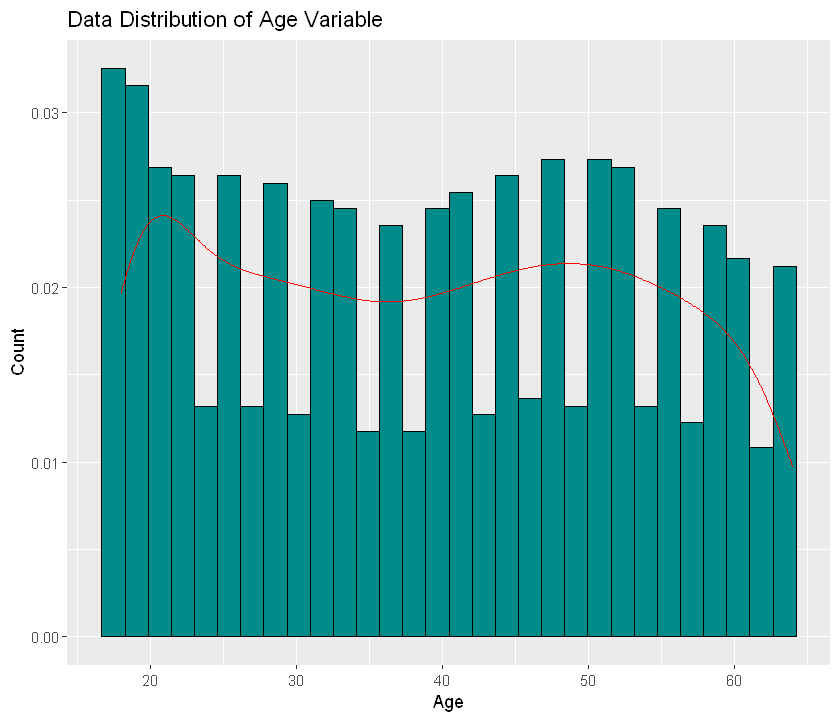

In [119]:
print(pl)

<h3>Box Plot:</h3>
<p>To check outliers, I can use box plot

In [120]:
pl <- ggplot(df, aes(x=age)) + geom_boxplot(fill = 'cyan3', color = "black") + ggtitle("Box Plot of Age Variable")

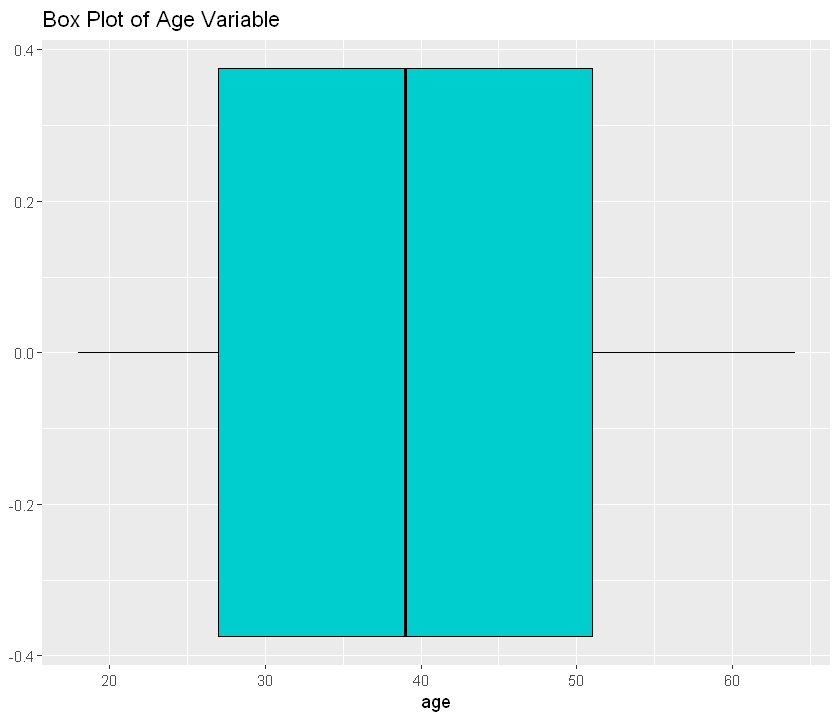

In [121]:
print(pl)

- Age Variable not normally distributed
- There is no outliers in Age Variable
- Customer of this dataset are 18 - 64 

### BMI:

<h3>Histogram Plot:</h3>

In [122]:
pl <- ggplot(df, aes(x=bmi)) + geom_histogram(aes(y = ..density..),fill = 'cornsilk3', color = "black") + geom_density(color = "red") + xlab("BMI") + ylab("Count") + ggtitle("Data Distribution of BMI Variable")

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



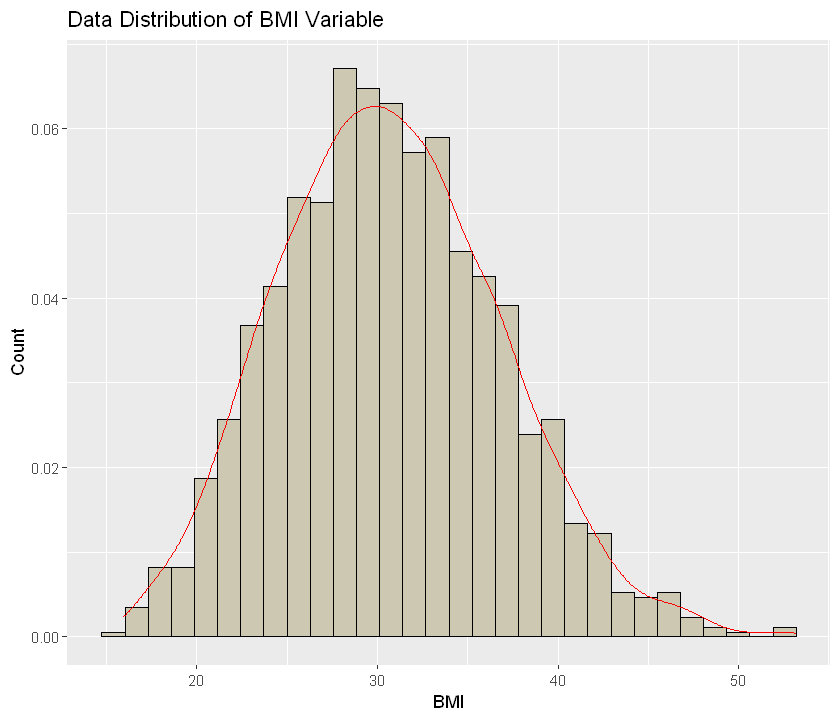

In [123]:
print(pl)

<h3>Box Plot:</h3>

In [124]:
pl <- ggplot(df, aes(x=bmi)) + geom_boxplot(fill = 'cornsilk2', color = "black") + ggtitle("Box Plot of BMI Variable")

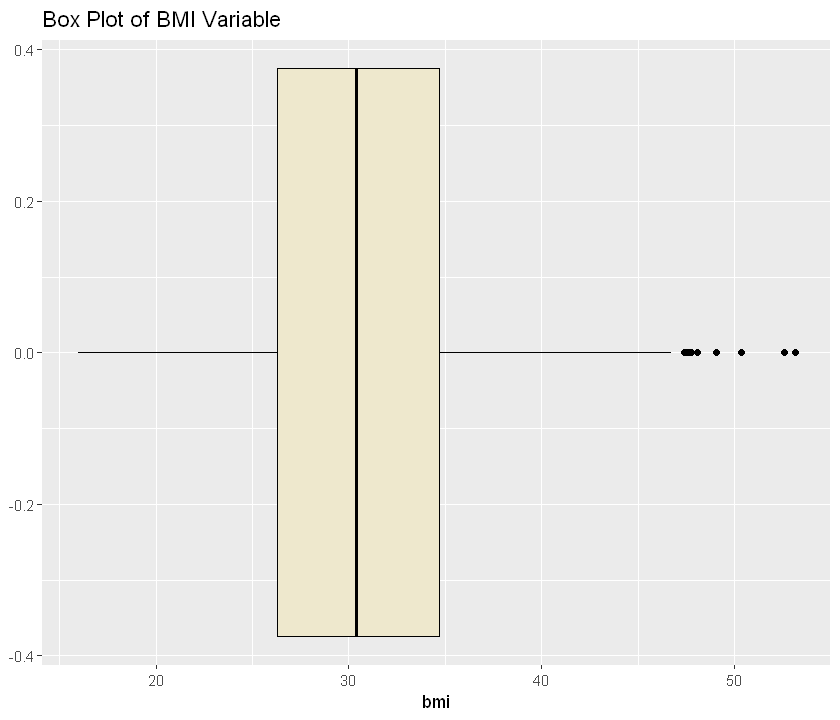

In [125]:
print(pl)

- BMI Variable normally distributed
- There is some outliers in BMI Variable
- Customer of this dataset have bmi between 15.96 - 53.13 

### Charges:

<h3>Histogram Plot:</h3>

In [126]:
pl <- ggplot(df, aes(x=charges)) + geom_histogram(aes(y = ..density..),fill = 'aquamarine3', color = "black") + geom_density(color = "red") + xlab("Charges") + ylab("Count") + ggtitle("Data Distribution of Charges Variable")

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



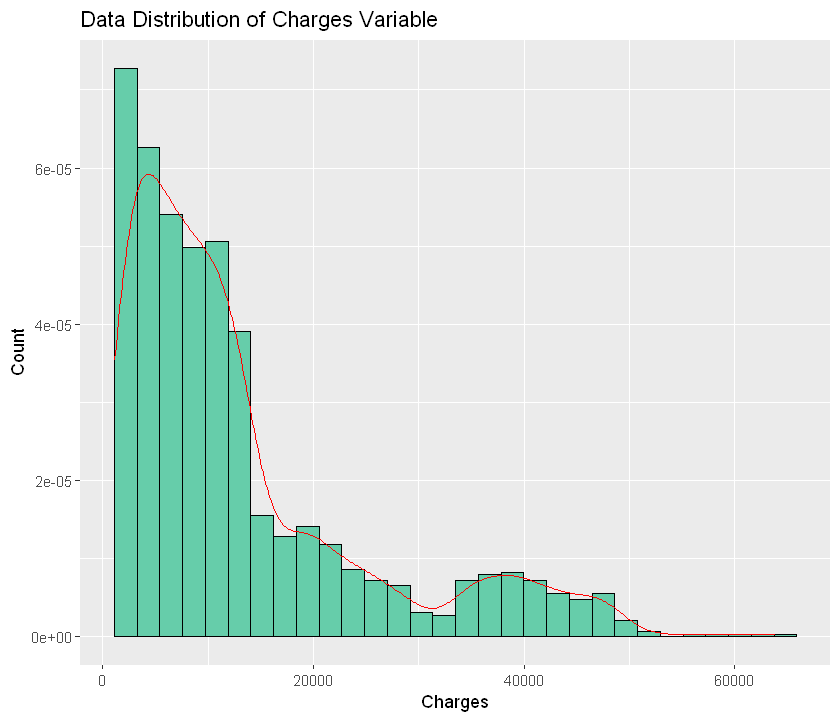

In [127]:
print(pl)

<h3>Box Plot:</h3>

In [128]:
pl <- ggplot(df, aes(x=charges)) + geom_boxplot(fill = 'aquamarine2', color = "black") + ggtitle("Box Plot of Charges Variable")

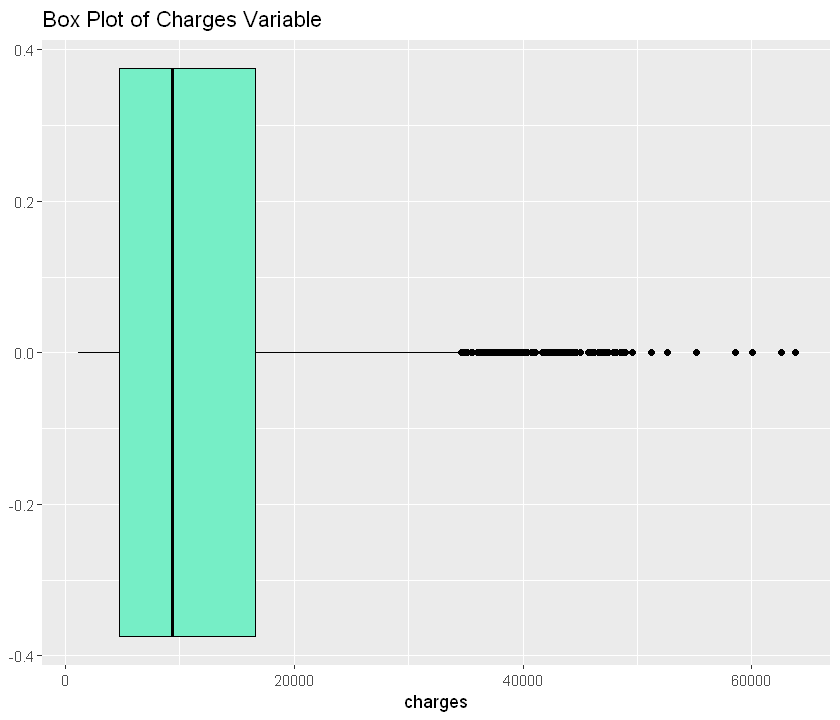

In [129]:
print(pl)

- Charges Variable not normally distributed
- There is many outliers in Charges Variable
- Range of this variable between 1120 - 63770 US dollars 

### Conclusion of Univariate Analysis for Continous Variables:
- After this analysis, I think I need standar scaler in feature engineering because this dataset has outliers in some variables, especially dependent variable, and other that mostly variable not normally distributed
- Besides that, I think when I want to check the correlation I need spearman method because I have non-parametric dataset, age and charges 

## Univariate Analysis for Discrete Variables:
For discrete variables, I will use data visualization to see the amount of data from each value

### Children

In [130]:
pl <- ggplot(df, aes(x=children)) + geom_bar(fill = 'pink1', color = "black") + xlab("Children") + ylab("Count") + ggtitle("Data Distribution of Children Variable")

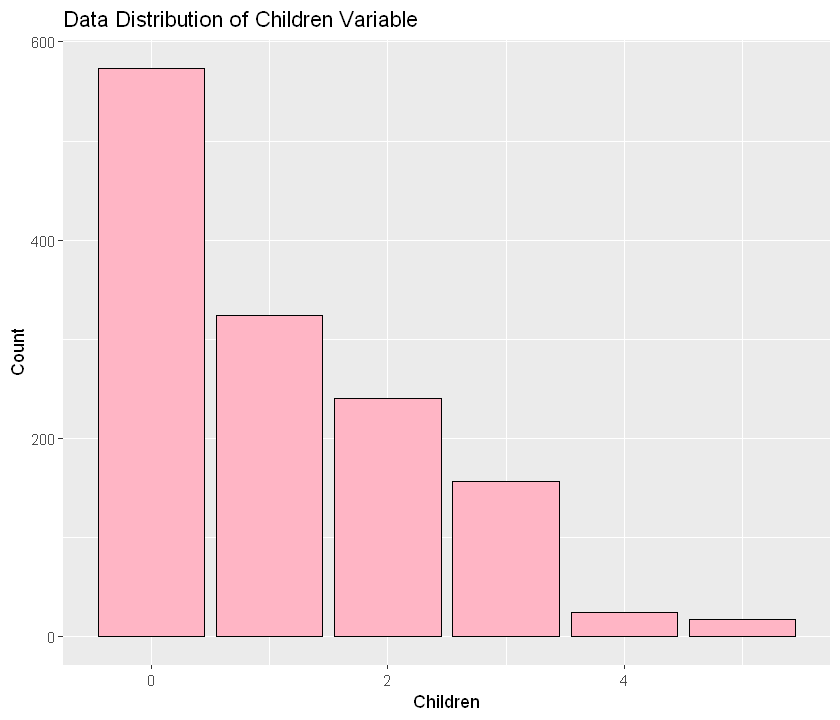

In [131]:
print(pl)

### Conculision of Univariate Analysis for Discrete Variables:
- From this visualization, It can be seen that many customers in my dataset do not have children

## Univariate Analysis for Qualitative Variables:
- Same as before, I want to check data distribution for Qualitative Variables

### Sex:

In [132]:
pl2 <- ggplot(df, aes(x=sex)) + geom_bar(fill = 'cadetblue2', color = "black") + xlab("Sex") + ylab("Count") + ggtitle("Count Plot of Sex Variable")

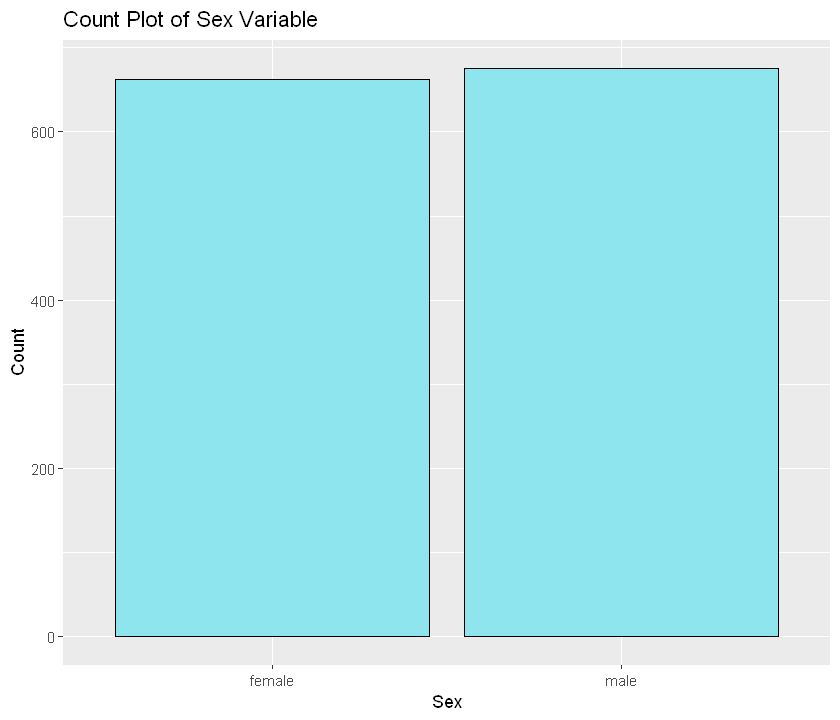

In [133]:
print(pl2)

In my dataset, Sex variables has uniform distribution, either female or male have almost the same amount of data

### Smoker:

In [134]:
pl2 <- ggplot(df, aes(x=smoker)) + geom_bar(fill = 'cadetblue3', color = "black") + xlab("Smoker") + ylab("Count") + ggtitle("Count Plot of Smoker Variable")

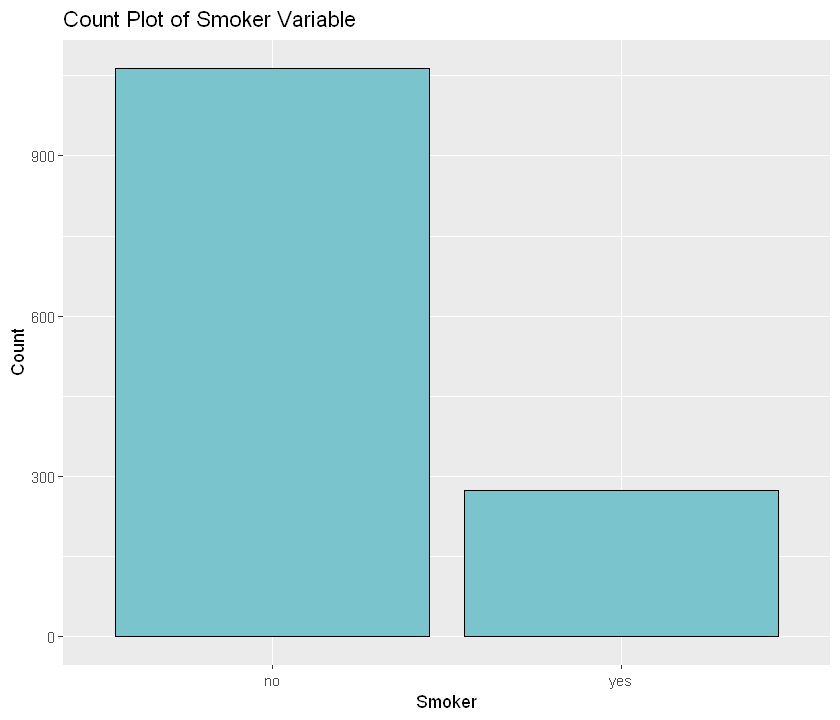

In [135]:
print(pl2)

There is more non-smoker customer than smoker customer in my dataset

### Region:

In [136]:
pl2 <- ggplot(df, aes(x=region)) + geom_bar(fill = 'cadetblue4', color = "black") + xlab("Regional") + ylab("Count") + ggtitle("Count Plot of Regional Variable")

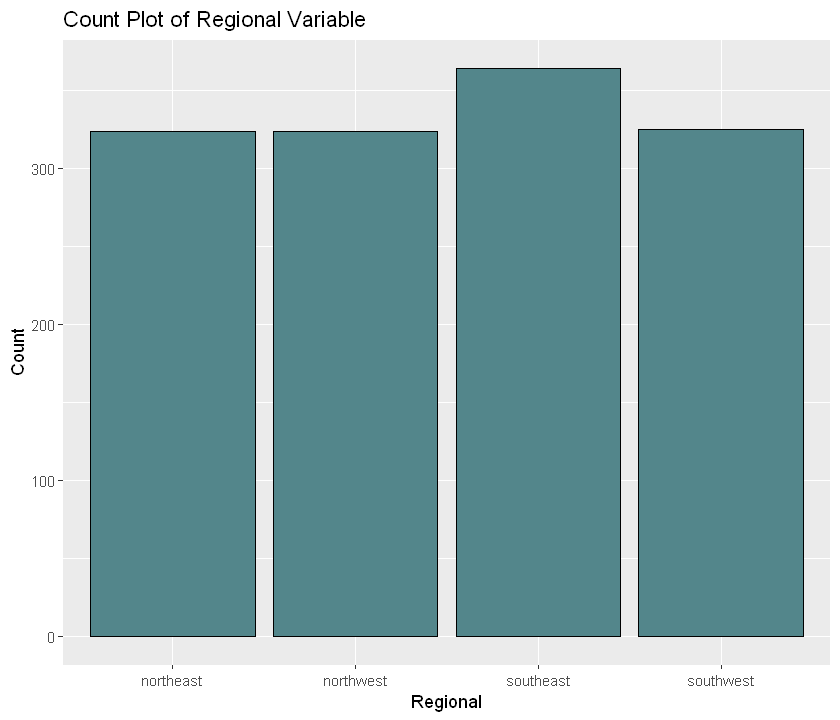

In [137]:
print(pl2)

For Regional variable, many of the customers come from Southeast. However, not too much different from the others

### Conclusion of Univariate Analysis for Qualitative Variables:
- From here, I found that qualitative variables can be encoded using only one hot encoding because the number of unique values is not much and I can use drop first because I will use regression model. 
- Beside that, there is some question that I want to find out:
    - Is there a correlation between Qualitative Variables and Charge variables, especially in the region, I wonder if the average charge from each region is different or not much different? 
    - If there are differences for each region then the next question is why?

## Bivariate Analysis for Numerical Variables:
To simplify the analysis, I will use a pair plot


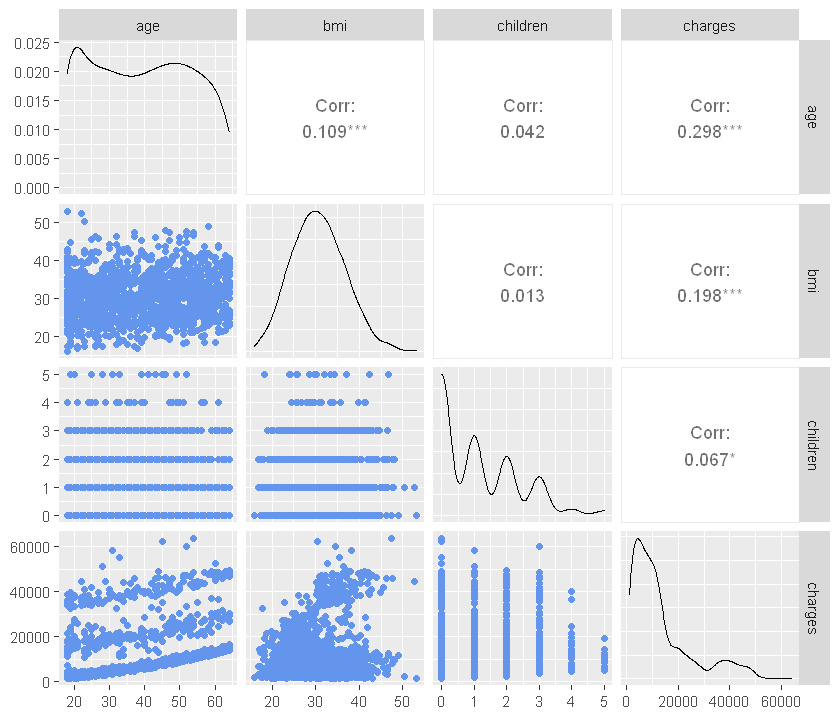

In [138]:
ggpairs(df, columns = c("age", "bmi", "children", "charges"), lower=list(continuous=wrap(ggally_points, color = "cornflowerblue")))

### Conclusion Bivariate Analysis for Numerical Variables:
- Variables that have strongest correlation is between Age and Charge. It's make sense because usually customer who are no longer young more risky for chronic disease. Other than that, BMI and Charge is the second variable that has the strongest correlation and I think the reason not much different like Age and Charge, customer who have obesity are usually more risky for chronic disease
- Even though, there is no strong correlation between all numerical value including Age and Charge (0.289) and BMI and Charge (0.198). To solve the problem, I think later in feature engineering I can use polynomial feature to get combination feature  

## Bivariate Analysis for Qualitative Variables and Quantitativ Variable (Charges):

### Sex and Charges:

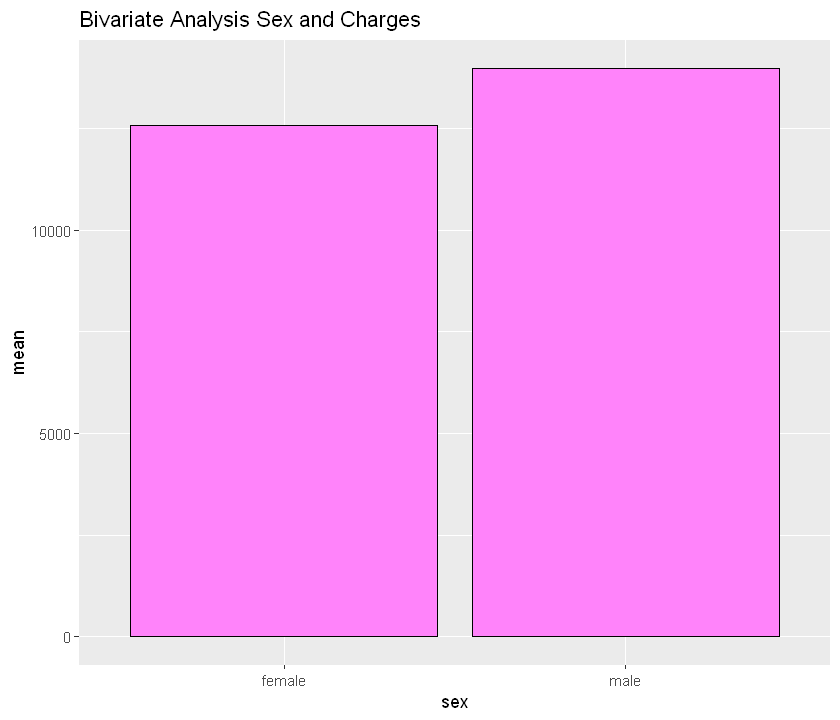

In [139]:
df %>% group_by(sex) %>% summarise(mean = mean(charges)) %>% ggplot(aes(x  = sex, y = mean)) + geom_bar(stat = "identity", fill = "orchid1", color = "black") + ggtitle("Bivariate Analysis Sex and Charges")

### Smoker vs Charges:

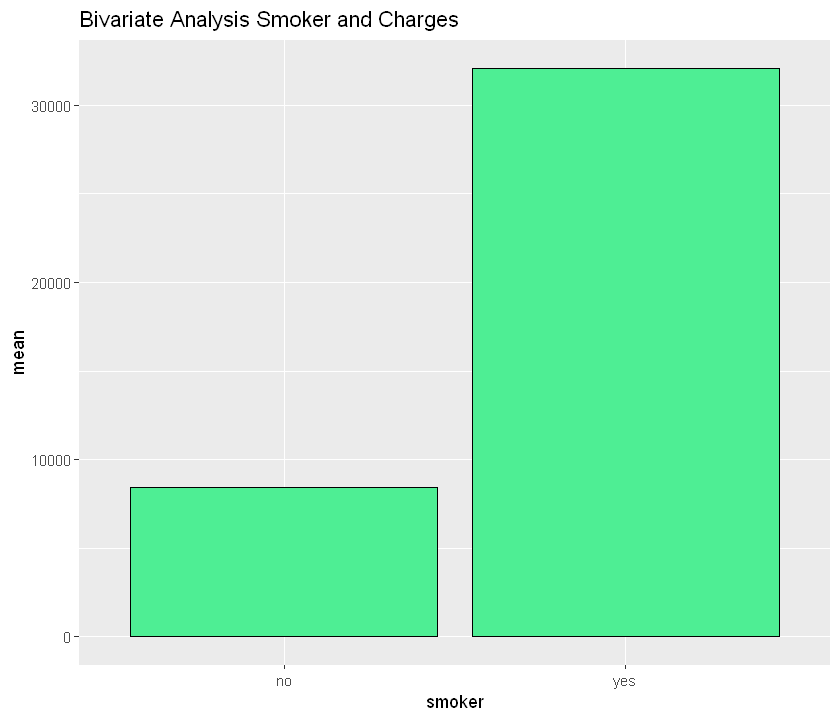

In [140]:
df %>% group_by(smoker) %>% summarise(mean = mean(charges)) %>% ggplot(aes(x  = smoker, y = mean)) + geom_bar(stat = "identity", fill = "seagreen2", color = "black") + ggtitle("Bivariate Analysis Smoker and Charges")

### Region vs Charges:

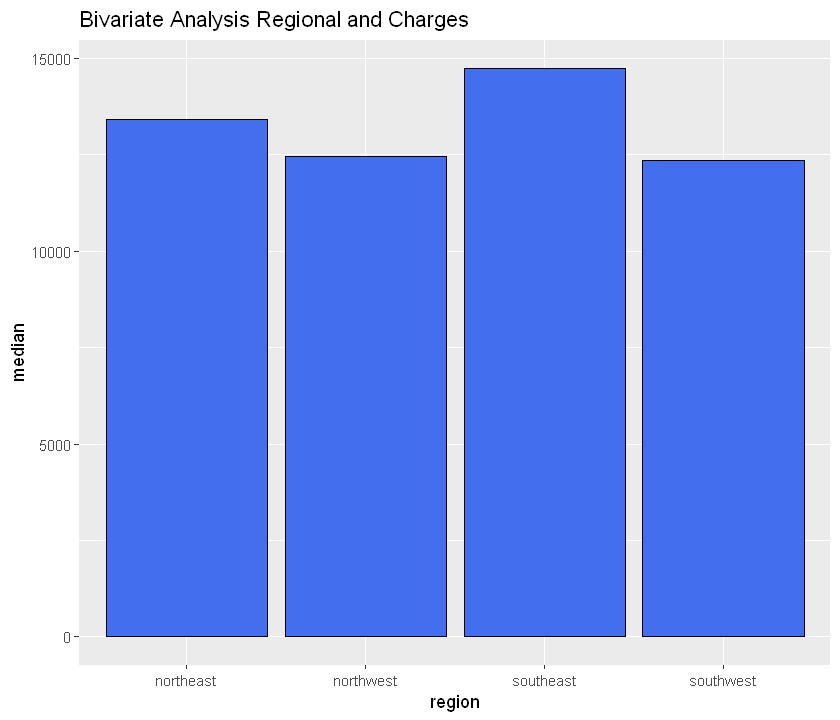

In [141]:
df %>% group_by(region) %>% summarise(median = mean(charges)) %>% ggplot(aes(x  = region, y = median)) + geom_bar(stat = "identity", fill = "royalblue2", color = "black") + ggtitle("Bivariate Analysis Regional and Charges")

### Conclusion of Bivariate Analysis for Qualitative Variables and Quantitative Variables:
- There is significant different between smoker and non-smoker. This company is very concern about smoker because according a lot of research smoking can increase the risk of getting cancer, especially lung. That's why customer who are smokers will have a bigger charge than non-smoker
- There is slightly different mean charge between female and male. Probably, it happenned because many male customers are smokers or erderly than women. I have to think twice whether I should include sex variables or not in the model later because if I include sex variables in my model, my model will have bias about gender
- Each regional has differences even thoughs it is not too significant as the smoker variables and regional which has the biggest charge value is southeast
- I don't think this company more because of regional different, maybe in southeast regional is more customers are eldery, or smokers. Because of that, I will do Multivariate analysis to find out why southeast is the region that has highest charge.

## Multivariate Analysis:
Multivariate analysis was conducted to find out why the northeast regional has the highest charge

### Regional, Charge, and Smoker

`summarise()` has grouped output by 'region'. You can override using the `.groups` argument.



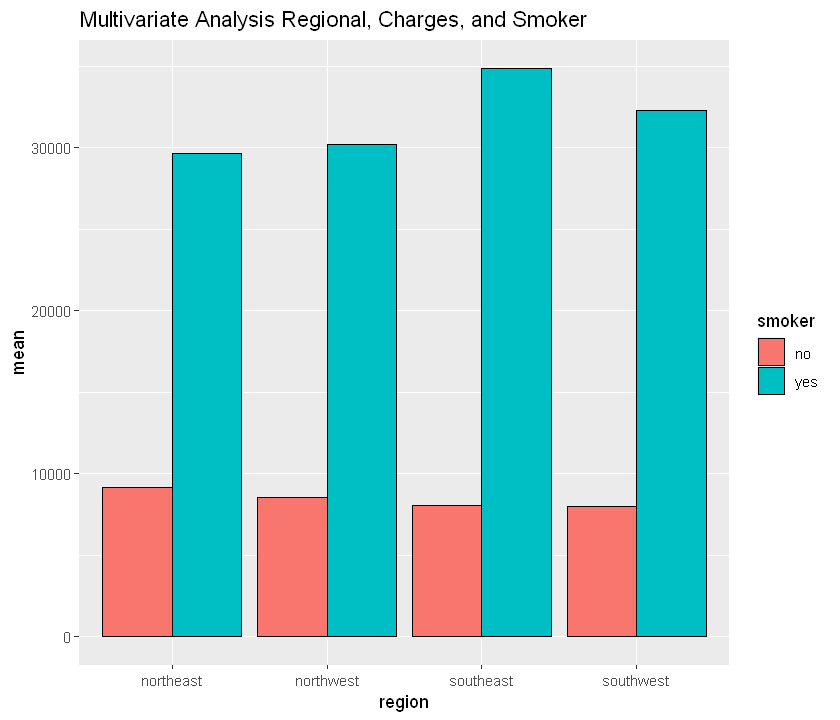

In [142]:
df %>% group_by(region, smoker) %>% summarise(mean = mean(charges)) %>% ggplot(aes(x  = region, y = mean)) + geom_bar(stat = "identity", aes(fill = smoker), color = "black", position = "dodge") + ggtitle("Multivariate Analysis Regional, Charges, and Smoker")

### Region, Charge, Smoker, and Age

In [143]:
pl4 <- ggplot(data = df, aes(x = age, y = charges)) + geom_point(aes(color = region,shape = smoker)) + xlab("Age") + ylab("Charges") + ggtitle("Multivariate Analysis Regional, Charges, Smoker, and Age")

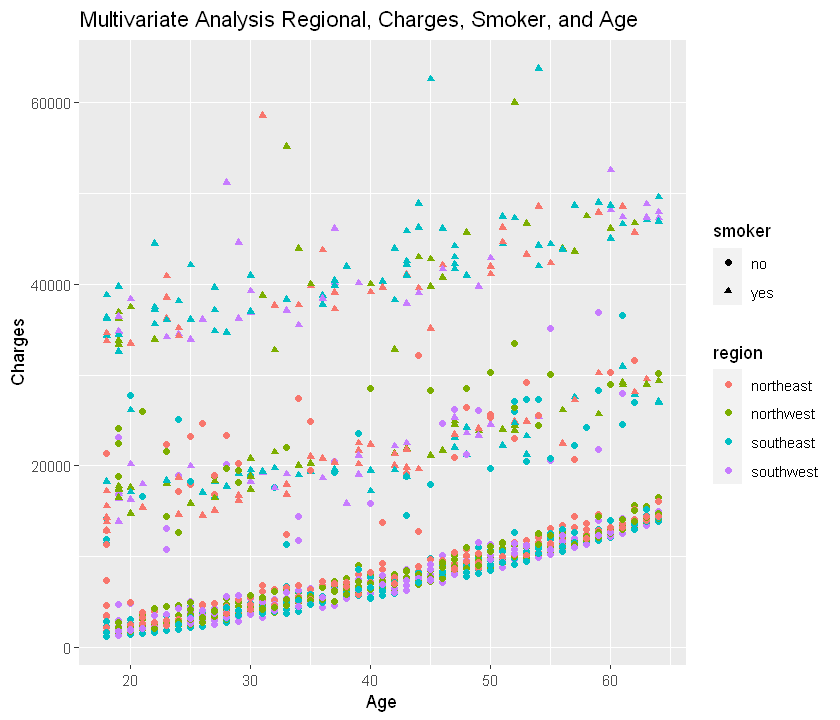

In [144]:
print(pl4)

### Region, Charge, Smoker, and BMI

In [145]:
pl4 <- ggplot(data = df, aes(x = bmi, y = charges)) + geom_point(aes(color = region,shape = smoker)) + xlab("BMI") + ylab("Charges") + ggtitle("Multivariate Analysis Regional, Charges, Smoker, and BMI")

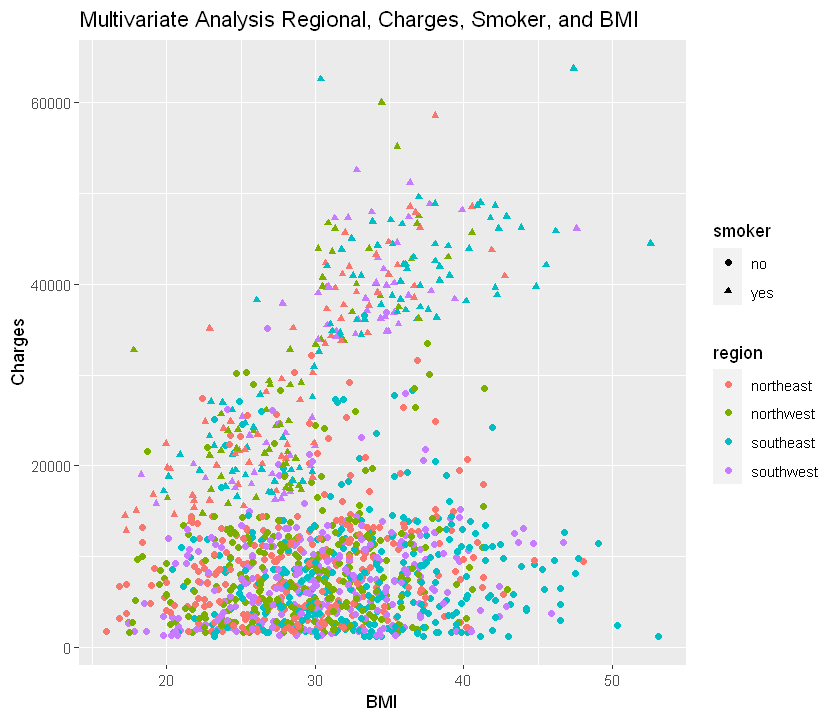

In [146]:
print(pl4)

### Conclusion of Multivariate Analysis:
I think the main reason why southeast region has the highest charge is because many customers in southeast region are smokers. Whereas Age and BMI only supporting variables in determining charges of customer. In order to find out more deeply how much influence a variables have on charge, I will use machine learning regression algorithm, such as linear regression or decision tree regresor